#### DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


<h2>Importing Necessary python Libraries and modules</h2>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score, auc , roc_curve
from sklearn.model_selection import GridSearchCV

from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from tqdm import tqdm_notebook as tqdm
import os
import pickle

<h1>1. READING DATA</h1>

In [13]:
data_projects = pd.read_csv('../Datasets/donor_choose_train_data.csv')
data_resources = pd.read_csv('../Datasets/donor_choose_resources.csv')

In [14]:
print("Shape of training dataset =",data_projects.shape)
print("Shape of resources dataset =",data_resources.shape)

Shape of training dataset = (109248, 17)
Shape of resources dataset = (1541272, 4)


In [15]:
print("Columns in train dataset = ",data_projects.columns)
print("*"*50)
print("Columns in resources dataset = ",data_resources.columns)

Columns in train dataset =  Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
**************************************************
Columns in resources dataset =  Index(['id', 'description', 'quantity', 'price'], dtype='object')


<h2>1.1 Converting Date time format and sorting Data by Date</h2>

In [16]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(data_projects.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
data_projects['Date'] = pd.to_datetime(data_projects['project_submitted_datetime'])
data_projects.drop('project_submitted_datetime', axis=1, inplace=True)
data_projects.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
data_projects = data_projects[cols]
data_projects.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [17]:
output_value_counts = data_projects['project_is_approved'].value_counts()
output_value_counts

1    92706
0    16542
Name: project_is_approved, dtype: int64

<h1>2. PREPROCESSING</h1>

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


<h2>2.1 Project Categories</h2>

In [20]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cats = list(data_projects['project_subject_categories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)

data_projects["clean_categories"] = category_list
data_projects.drop(["project_subject_categories"], axis = 1, inplace = True)

#preprocessing
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_coll = Counter()
for x in data_projects['clean_categories'].values:
    my_coll.update(x.split())
    
my_coll = dict(my_coll)
print(my_coll)
sorted_coll_dict = dict(sorted(my_coll.items(), key=lambda x: x[1]))
print((sorted_coll_dict))

{'Math_Science': 41421, 'SpecialNeeds': 13642, 'Literacy_Language': 52239, 'AppliedLearning': 12135, 'History_Civics': 5914, 'Music_Arts': 10293, 'Health_Sports': 14223, 'Warmth': 1388, 'Care_Hunger': 1388}
{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


<h2>2.2 Project Subcategories</h2>

In [21]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cats = list(data_projects['project_subject_subcategories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)    

data_projects["clean_sub_categories"] = category_list
data_projects.drop(["project_subject_subcategories"], axis = 1, inplace = True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_coll_sub = Counter()
for x in data_projects['clean_sub_categories'].values:
    my_coll_sub.update(x.split())
    
my_coll_sub = dict(my_coll_sub)
sorted_coll_dict_sub = dict(sorted(my_coll_sub.items(), key=lambda x: x[1]))
print(sorted_coll_dict_sub)


{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


<h2> 2.3 Project Essay </h2>


In [22]:
data_projects['essay'] = data_projects['project_essay_1'].map(str) \
                 + data_projects['project_essay_2'].map(str) \
                 + data_projects['project_essay_3'].map(str) \
                 + data_projects['project_essay_4'].map(str)

In [23]:
# tqdm is for printing the status bar
#https://tqdm.github.io
from tqdm import tqdm
preprocessed_essay = []

for item in tqdm(data_projects['essay'].values):
        it = decontracted(item)
        it = it.replace('\\r', ' ')
        it = it.replace('\\"', ' ')
        it = it.replace('\\n', ' ')
        it = re.sub('[^A-Za-z0-9]+', ' ',it)
        it = ' '.join(e for e in it.split() if e not in stopwords)
        preprocessed_essay.append(it.lower().strip())
        
preprocessed_essay[1000]
data_projects['preprocessed_essays'] = preprocessed_essay

100%|████████████████████████████████| 109248/109248 [01:10<00:00, 1560.32it/s]


<h2> 2.4 PROJECT TITLE</h2>

In [24]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(data_projects['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
data_projects['preprocessed_titles'] = preprocessed_titles

100%|███████████████████████████████| 109248/109248 [00:03<00:00, 35135.27it/s]


<h2> 2.5. PROJECT GRADE</h2>

In [25]:
data_projects['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [26]:
data_projects['project_grade_category'] = data_projects['project_grade_category'].str.replace(" ", "_")
data_projects['project_grade_category'].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

<h2> 2.6. TEACHER PREFIX PREPROCESSING </h2>

In [27]:
data_projects['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [17]:
data_projects['teacher_prefix'] = data_projects['teacher_prefix'].str.replace(".", "")
data_projects['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

<h2><font color='red'> $2.7$ Adding auxiliary derived features </font></h2>
<h3><font color='blue'> $2.7.1$ Sentiment Score </font></h3>

In [18]:
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_id = SentimentIntensityAnalyzer()
essay = data_projects['essay']
essay_sentiments = []

for e in tqdm(essay):
    scores = sentiment_id.polarity_scores(e)
    essay_sentiments.append(scores['compound']) #Considering compound as a criteria.

data_projects['essay_sentiment'] = essay_sentiments

100%|█████████████████████████████████| 109248/109248 [05:31<00:00, 329.36it/s]


<h3><font color='blue'> $2.7.1$ number of words of project titles and essays </font></h3>

In [19]:
for col, new_col in [('project_title', 'title_size'), ('essay', 'essay_size')]:
    data_col = data_projects[col]
    col_size = []
    for i in data_col:
        i = decontracted(i)
        col_size.append(len(i.split()))
    data_projects[new_col] = col_size

In [20]:
data_projects.to_csv("final_data_features.csv", index=False)

In [28]:
if os.path.isfile('final_data_features.csv'):
    data_projects = pd.read_csv("final_data_features.csv")
else:
    print("Run all previous code in this notebook")
data_projects.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles,essay_sentiment,title_size,essay_size
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom,0.9885,6,288
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,Grades_3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old you third grade classroo...,sensory tools focus,0.9950,4,349
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs,CA,2016-04-27 00:46:53,Grades_PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,having class 24 students comes diverse learner...,mobile learning mobile listening center,0.9866,7,177
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs,GA,2016-04-27 00:53:00,Grades_PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,i recently read article giving students choice...,flexible seating flexible learning,0.9595,5,225
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs,WA,2016-04-27 01:05:25,Grades_3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",my students crave challenge eat obstacles brea...,going deep the art inner thinking,0.9885,7,185


<h1> 3. Preparing Data for Models </h1>


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [29]:
y = data_projects['project_is_approved'].values
data_projects.drop(['project_is_approved'], axis = 1, inplace = True)
X = data_projects

In [30]:
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles,essay_sentiment,title_size,essay_size
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom,0.9885,6,288


<h2><b> $3.1$ Splitting data into Train and test set</b></h2>

In [31]:
#Since we perform hyper-parameter tuning using gridSearchCV, we need only train set and test set as cross validation set
#is formed while performing gridSearchCV(python sklearn implementation)
#default value of cv =5 is used by sklearn's gridSearchCV implementation.
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [32]:
print("Shape  of Train dataset :",X_train.shape)
print("***"*10)
print("Shape  of Test dataset :",X_test.shape)

Shape  of Train dataset : (73196, 22)
******************************
Shape  of Test dataset : (36052, 22)


<h2> $3.2$ One Hot Encoding of categorical features: </h2>


In [33]:
data_projects.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_sub_categories', 'essay', 'preprocessed_essays',
       'preprocessed_titles', 'essay_sentiment', 'title_size', 'essay_size'],
      dtype='object')

<h3> 3.2.2. clean_categories: </h3>

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(vocabulary=list(sorted_coll_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['clean_categories'].values)

cat_one_hot_train = vec.transform(X_train['clean_categories'].values)
cat_one_hot_test = vec.transform(X_test['clean_categories'].values)

print(cat_one_hot_train.shape)
print(cat_one_hot_test.shape)
print(vec.get_feature_names())


(73196, 9)
(36052, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


<h3> 3.2.3 clean_sub_categories:</h3>

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(vocabulary=list(sorted_coll_dict_sub.keys()),lowercase=False, binary=True)
vec.fit(X_train['clean_categories'].values)

sub_cat_one_hot_train = vec.transform(X_train['clean_categories'].values)
sub_cat_one_hot_test = vec.transform(X_test['clean_categories'].values)

print(sub_cat_one_hot_train.shape)
print(sub_cat_one_hot_test.shape)
print(vec.get_feature_names())


(73196, 30)
(36052, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


<h3> 3.2.4. school_state </h3>

In [36]:
state = Counter()
for st in data_projects['school_state'].values:
    state.update(st.split())
dict_state = dict(state)
sorted_state_dict = dict(sorted(state.items(), key=lambda x: x[1]))

In [37]:
vec = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['school_state'].values)

school_state_one_hot_train = vec.transform(X_train['school_state'].values)
school_state_one_hot_test = vec.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)
print(vec.get_feature_names())

Shape of Train data - one hot encoding (73196, 51)
Shape of Test data - one hot encoding (36052, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']


<h3> 3.2.5. PROJECT GRADE CATEGORIES: </h3>

In [38]:
grade = Counter()
for gd in data_projects['project_grade_category'].values:
    grade.update(gd.split())
dict_grade = dict(grade)
sorted_grade_dict = dict(sorted(dict_grade.items(), key=lambda x: x[1]))

In [39]:
vec = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['project_grade_category'].values)

grade_one_hot_train = vec.transform(X_train['school_state'].values)
grade_one_hot_test = vec.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",grade_one_hot_train.shape)
print("Shape of Test data - one hot encoding",grade_one_hot_test.shape)

print(vec.get_feature_names())

Shape of Train data - one hot encoding (73196, 4)
Shape of Test data - one hot encoding (36052, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


<h3> 3.2.6. teacher_prefix </h3>

In [40]:
prefix = Counter()
for tp in data_projects['teacher_prefix'].values:
    tp = str(tp)
    prefix.update(tp.split())

dict_prefix = dict(prefix)
sorted_teacher_prefix_dict = dict(sorted(dict_prefix.items(), key=lambda x: x[1]))

In [41]:
vec = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_one_hot_train = vec.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_one_hot_test = vec.transform(X_test['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_one_hot_test.shape)

print(vec.get_feature_names())

Shape of Train data - one hot encoding (73196, 6)
Shape of Test data - one hot encoding  (36052, 6)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


<h2> $3.3.$ Vectorizing Text Data</h2>

<h2> 3.3.1 Bag of Words:</h2>

<h3> 3.3.1.1 Essays:</h3>

In [42]:
#words which appeared in at least 10 documents(rows or projects).
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer/35615151
vector = CountVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vector.fit(X_train["preprocessed_essays"])

train_essay_bow = vector.transform(X_train["preprocessed_essays"])
test_essay_bow = vector.transform(X_test["preprocessed_essays"])

print(train_essay_bow.shape)
print(test_essay_bow.shape)

(73196, 5000)
(36052, 5000)


<h3> 3.3.1.2 Project Titles</h3>

In [43]:
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer/35615151
vector = CountVectorizer()
vector.fit(X_train["preprocessed_titles"])

train_title_bow = vector.transform(X_train["preprocessed_titles"])
test_title_bow = vector.transform(X_test["preprocessed_titles"])

print(train_title_bow.shape)
print(test_title_bow.shape)

(73196, 14015)
(36052, 14015)


<h2> 3.4. TF-IDF Vectorizer </h2>

<h3> 3.4.1 Essay: </h3>

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vectorizer.fit(X_train["preprocessed_essays"])

train_essay_tfidf = vectorizer.transform(X_train["preprocessed_essays"])
test_essay_tfidf = vectorizer.transform(X_test["preprocessed_essays"])

print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)


(73196, 5000)
(36052, 5000)


<h3> 3.4.2 Titles: </h3>

In [45]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train["preprocessed_titles"])

train_title_tfidf = vectorizer.transform(X_train["preprocessed_titles"])
test_title_tfidf = vectorizer.transform(X_test["preprocessed_titles"])

print(train_title_tfidf.shape)
print(test_title_tfidf.shape)

(73196, 14015)
(36052, 14015)


<h2> 3.5 AVG W2V Vectorizer </h2>

In [39]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
from tqdm import tqdm
import numpy as np

def loadGloveModel(gloveFile): 
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'utf8')
    model = {}
    
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print (len(model)," words loaded into vector")
    return model

<h3> 3.5.1 Loading W2V from glove file </h3> 

In [40]:
Model1 = loadGloveModel("../glove_vector/glove_word_vectors.txt")

Loading Glove Model


1917494it [10:40, 2991.89it/s]


1917494  words loaded into vector


<h3> 3.5.2 Saving word vectors in pickle file </h3> 

In [ ]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'wb') as f:
    pickle.dump(Model1, f)

<h3> 3.5.3 Loading word vectors from pickle file </h3> 

In [48]:
with open('glove_vectors', 'rb') as f:
    Model1 = pickle.load(f)
    model_keys =  set(Model1.keys())

In [49]:
print(len(model_keys))

1917494


<h3> 3.5.4 Mapping words present in Project Essays and Titles to the glove vectors </h3> 

In [50]:
#words present in our data
collection = []
for x in data_projects["preprocessed_essays"]:
    collection.extend(x.split(' '))
    
for y in data_projects["preprocessed_titles"]:
    collection.extend(y.split(' '))
    
collection = set(collection)
print(len(collection))

58968


In [51]:
#Words present in both the model and our data corpus(essays and titles)
common_words = set(Model1.keys()).intersection(collection)
print("Words present in both our data corpus and the glove vector model",len(common_words))

Words present in both our data corpus and the glove vector model 51503


In [52]:
#Vectors corresponding to the common words
corpus = {}
for item in list(common_words):
    corpus[item] = Model1[item]        
print("Length of word2vec = ",len(corpus))

Length of word2vec =  51503


<b>NOTE</b>: About 7k unique words(58968-51503) are not present in the glove vector file and hence does not have any corresponding vectors.So we  are missing around 7k words while encoding the Texts with Word2vec.

<h3> 3.5.5. Essay(AVG W2V) </h3>

In [53]:
def avg_w2v_func(data):
        vector = np.zeros(300) 
        count = 0
        for wd in data.split():
            if wd in model_keys:
                count += 1
                vector += Model1[wd]
        if(count!=0):
            vector /= count
        return vector


In [54]:
train_essay_avg_w2v = []
test_essay_avg_w2v = []

for x in tqdm(X_train['preprocessed_essays']):
    train_essay_avg_w2v.append(avg_w2v_func(x))

for x in tqdm(X_test['preprocessed_essays']):
    test_essay_avg_w2v.append(avg_w2v_func(x))


print(len(train_essay_avg_w2v))
print(len(test_essay_avg_w2v))

100%|███████████████████████████████████| 36052/36052 [00:49<00:00, 721.93it/s]


73196
36052


<h3> 3.5.6. PROJECT_TITLES </h3>

In [55]:
train_title_avg_w2v = []
test_title_avg_w2v = []

for x in tqdm(X_train['preprocessed_titles']):
    train_title_avg_w2v.append(avg_w2v_func(x))

for x in tqdm(X_test['preprocessed_titles']):
    test_title_avg_w2v.append(avg_w2v_func(x))

print(len(train_title_avg_w2v))
print(len(test_title_avg_w2v))

100%|██████████████████████████████████| 36052/36052 [00:08<00:00, 4462.85it/s]


73196
36052


<h2> $3.6$ TFIDF Weighted WORD2VEC </h2>

In [56]:
tfidf = TfidfVectorizer()
# tfidf.fit(X_train["preprocessed_essays"])
tfidf.fit(collection) #training the model from collection of words in project essays and titles

dictionary_idf = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names())

In [57]:
#Function to compute the Tfidf weighted word2Vec of words in out data(essay and titles)
def tfidf_w2v_func(data):
    tfidf_w2v = np.zeros(300) 
    weight = 0
    for wd in data.split():
        if (wd in model_keys) and (wd in tfidf_words):
            vector_w2v = Model1[wd] #w2v for each word
            tf_word = data.count(wd)/len(data.split())
            tf_idf_word = dictionary_idf[wd] * tf_word
            tfidf_w2v += (vector_w2v * tf_idf_word)
            weight += tf_idf_word
    if( weight != 0):
        tfidf_w2v /= weight
    return tfidf_w2v


<h3> 3.6.1. PROJECT ESSAYS </h3>

In [58]:
train_essay_tfidf_w2v = []
test_essay_tfidf_w2v = []

for x in tqdm(X_train['preprocessed_essays']):
    train_essay_tfidf_w2v.append(tfidf_w2v_func(x))

for x in tqdm(X_test['preprocessed_essays']):
    test_essay_tfidf_w2v.append(tfidf_w2v_func(x))


print(len(train_essay_tfidf_w2v))
print(len(test_essay_tfidf_w2v))

100%|███████████████████████████████████| 36052/36052 [01:26<00:00, 414.95it/s]


73196
36052


<h3> 3.6.2. PROJECT TITLES </h3>

In [59]:
train_title_tfidf_w2v = []
test_title_tfidf_w2v = []

for x in tqdm(X_train['preprocessed_titles']):
    train_title_tfidf_w2v.append(tfidf_w2v_func(x))

for x in tqdm(X_test['preprocessed_titles']):
    test_title_tfidf_w2v.append(tfidf_w2v_func(x))


print(len(train_title_tfidf_w2v))
print(len(test_title_tfidf_w2v))

100%|█████████████████████████████████| 36052/36052 [00:01<00:00, 24810.73it/s]


73196
36052


<h2> $3.7.$ Vectorizing Numerical Data </h2>
PRICE , QUANTITY , Number of Projects Proposed Previously by the Teacher

<h3> 3.7.1 Price </h3>

In [60]:
price_data = data_resources.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [61]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [62]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
price_numerical = StandardScaler()
price_numerical.fit(X_train['price'].values.reshape(-1,1))

standardized_price_train = price_numerical.transform(X_train['price'].values.reshape(-1,1))
standardized_price_test = price_numerical.transform(X_test['price'].values.reshape(-1,1))

print(standardized_price_train.shape,"and",y_train.shape)
print(standardized_price_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h3> 3.7.2 Quantity </h3>

In [63]:
quantity_numerical = StandardScaler()
quantity_numerical.fit(X_train['quantity'].values.reshape(-1,1)) 

standardized_quantity_train = quantity_numerical.transform(X_train['quantity'].values.reshape(-1,1))
standardized_quantity_test = quantity_numerical.transform(X_test['quantity'].values.reshape(-1,1))

print(standardized_quantity_train.shape,"and",y_train.shape)
print(standardized_quantity_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h3> 3.7.3 Number of previously posted projects by teachers </h3>

In [64]:
teacher_no_previous_project_numerical = StandardScaler()
teacher_no_previous_project_numerical.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 

standardized_teacher_no_train = teacher_no_previous_project_numerical.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_teacher_no_test = teacher_no_previous_project_numerical.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(standardized_teacher_no_train.shape,"and",y_train.shape)
print(standardized_teacher_no_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h3> <font color='blue'>$3.7.4$ Sentiment Scores of essay text</h3>

In [65]:
scale = StandardScaler()
scale.fit(X_train['essay_sentiment'].values.reshape(-1,1)) 

standardized_sentiment_train = scale.transform(X_train['essay_sentiment'].values.reshape(-1,1))
standardized_sentiment_test = scale.transform(X_test['essay_sentiment'].values.reshape(-1,1))

print(standardized_sentiment_train.shape,"and",y_train.shape)
print(standardized_sentiment_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h3> <font color='blue'>$3.7.5$ Project Essay Length</h3>

In [66]:
scale = StandardScaler()
scale.fit(X_train['essay_size'].values.reshape(-1,1)) 

standardized_essay_size_train = scale.transform(X_train['essay_size'].values.reshape(-1,1))
standardized_essay_size_test = scale.transform(X_test['essay_size'].values.reshape(-1,1))

print(standardized_essay_size_train.shape,"and",y_train.shape)
print(standardized_essay_size_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h3> <font color='blue'>$3.7.6$ Project Title Length</h3>

In [67]:
scale = StandardScaler()
scale.fit(X_train['title_size'].values.reshape(-1,1)) 

standardized_title_size_train = scale.transform(X_train['title_size'].values.reshape(-1,1))
standardized_title_size_test = scale.transform(X_test['title_size'].values.reshape(-1,1))

print(standardized_title_size_train.shape,"and",y_train.shape)
print(standardized_title_size_test.shape,"and",y_test.shape)

(73196, 1) and (73196,)
(36052, 1) and (36052,)


<h1><b>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets<b></h1>

In [68]:
#Functions required for all further tasks.
#REFERENCES:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier/22821#22821
#CONFUSION MATRIX: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
#https://www.codespeedy.com/how-to-plot-roc-curve-using-sklearn-library-in-python/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
def prob_scores(clf,data):
    y_pred = []
    loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,loop,1000):
        y_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    y_pred.extend(clf.predict_proba(data[loop:])[:,1])
    return y_pred

def getAUC(X, y):
    auc_train = []
    auc_cv = []
    Cs = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]
    parameters = [{'alpha': Cs}]
    lro = SGDClassifier(max_iter = 1000, loss = "log")
    clf = GridSearchCV(lro, parameters, cv=3, scoring='roc_auc',return_train_score=True)
    clf.fit(X, y)
    auc_train = clf.cv_results_['mean_train_score']
    auc_train_std = clf.cv_results_['std_train_score']
    auc_cv = clf.cv_results_['mean_test_score'] 
    auc_cv_std= clf.cv_results_['std_test_score']
    return Cs , auc_train, auc_cv

def plotPerformance(C, auc_train, auc_cv, encoding):
    plt.plot(np.log(C), auc_train, label='AUC_Train')
    plt.plot(np.log(C), auc_cv, label='AUC_Validation')
    plt.scatter(np.log(C), auc_train, label='train points')
    plt.scatter(np.log(C), auc_cv, label='test points')
    plt.xlabel('Hyperparameter - C')
    plt.ylabel('AUC')
    plt.title("AUC on various Cs using {} on text features".format(encoding))
    plt.legend()
    
def getOptimal_C(C,cv_score):
    score_cv = [i for i in cv_score]
    opt_cv = C[score_cv.index(max(score_cv))] #https://www.programiz.com/python-programming/methods/list/index
    return opt_cv

def train_using_optimal_c(optimal_c, X_te, y_te):
    lro = LogisticRegression(C = optimal_c)
    lro.fit(X_te, y_te)
    return lro

def getROCData(data_pnt_test, y_test, data_pnts_train, y_train, lro):
    predicted_y_test = prob_scores(lro,data_pnt_test)
    predicted_y_train = prob_scores(lro,data_pnts_train)
    fpr_test, tpr_test, thres_test = roc_curve(y_test, predicted_y_test)
    fpr_tr, tpr_tr, thres_tr = roc_curve(y_train, predicted_y_train)
    return [fpr_test, tpr_test, thres_test], [fpr_tr, tpr_tr, thres_tr], predicted_y_test , predicted_y_train
        
def plotROC(fpr_test,fpr_tr, tpr_test,tpr_tr,encoding):
    plt.plot(fpr_tr, tpr_tr, label='AUC_Train')
    plt.plot(fpr_test, tpr_test, label='AUC_Test')
    plt.title("ROC Curve using {} on text features".format(encoding))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

def predicted_Values( prob_values, thresholds , tpr , fpr):
    threshold_optimal = thresholds[np.argmax(tpr*(1-fpr))] 
    # threshold for max value of tpr*(1-fpr)
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("Maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for optimal threshold", threshold_optimal)
    predicted_value_list = []
    for item in prob_values:
        if item >= threshold_optimal:
            predicted_value_list.append(1)# we are assigning a class value of 1 if the probability score given by  classifier  
            #is greater than the optimal threshold else 0.
        else:
            predicted_value_list.append(0)
    return predicted_value_list

def getConfusionMatrix(y_ , y_pred , thresholds , tpr, fpr,title ):
    #fmt='g': https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
    cm = confusion_matrix(y_, predicted_Values(y_pred, thresholds, tpr, fpr))
    cm_ = pd.DataFrame(cm, range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_, annot=True,annot_kws={"size": 16}, fmt='g')
    plt.xlabel("Predicted classes")
    plt.ylabel("Actual classes")
    plt.title('Confusion Matrix using {} on text features'.format(title))


<span>Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW with bi-grams with min_df=10 and max_features=5000)</span>

* ### $2.4.1$ Applying Logistic Regression on BOW,<font color='yellow'> SET $1$</font>

In [69]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train,train_title_bow, train_essay_bow)).tocsr()
X_test_merged = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test,test_title_bow, test_essay_bow)).tocsr()


print("FINAL DATA MATRIX FOR BOW")
print(X_train_merged.shape, y_train.shape)
print(X_test_merged.shape, y_test.shape)


FINAL DATA MATRIX FOR BOW
(73196, 19118) (73196,)
(36052, 19118) (36052,)


0.001


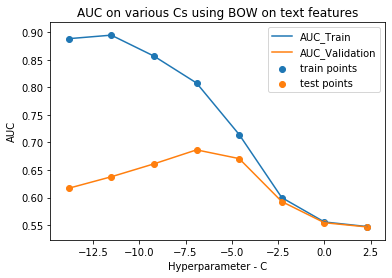

In [70]:
title1 = 'BOW'

C1, auc_tr1, auc_cv1 = getAUC(X_train_merged, y_train)
plotPerformance(C1, auc_tr1, auc_cv1, title1)
optimal_C1 = getOptimal_C(C1,auc_cv1)
print(optimal_C1)
lro1 = train_using_optimal_c(optimal_C1, X_test_merged, y_test)
roc_data_test1, roc_data_train1 , pred_y_test ,pred_y_train = getROCData(X_test_merged, y_test, X_train_merged, y_train, lro1)

AUC(train) :  0.6512277696691091 and AUC(test): 0.6836887085583927


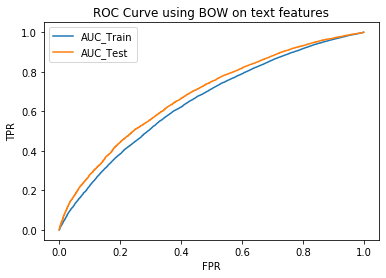

In [71]:
print("AUC(train) : ",auc(roc_data_train1[0],roc_data_train1[1]),"and AUC(test):",auc(roc_data_test1[0],roc_data_test1[1]))
plotROC(roc_data_test1[0], roc_data_train1[0],roc_data_test1[1], roc_data_train1[1], title1)

Maximum value of tpr*(1-fpr) 0.375714801036741 for optimal threshold 0.8293331746367824


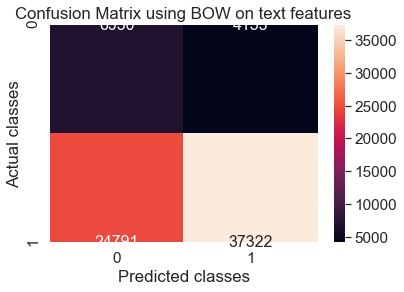

In [72]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train1[2],roc_data_train1[1],roc_data_train1[0], title1)

Maximum value of tpr*(1-fpr) 0.4014624232908013 for optimal threshold 0.8235398895005882


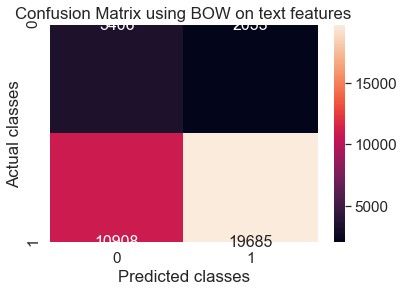

In [73]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test1[2],roc_data_test1[1],roc_data_test1[0], title1)

* ### $2.4.1$ Applying Logistic Regression on TFIDF encoding,<font color='yellow'> SET $2$</font>

In [74]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_tfidf = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test_merged_tfidf = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test, test_title_tfidf, test_essay_tfidf)).tocsr()


print("FINAL DATA MATRIX FOR TFIDF")
print(X_train_merged_tfidf.shape, y_train.shape)
print(X_test_merged_tfidf.shape, y_test.shape)

FINAL DATA MATRIX FOR TFIDF
(73196, 19118) (73196,)
(36052, 19118) (36052,)


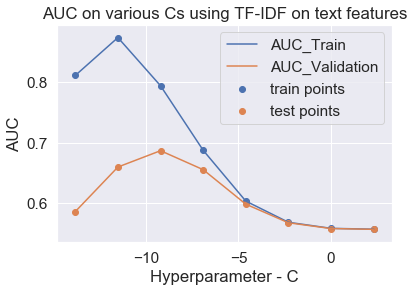

In [75]:
title2 = 'TF-IDF'

C2, auc_tr1, auc_cv1 = getAUC(X_train_merged_tfidf, y_train)
plotPerformance(C2, auc_tr1, auc_cv1, title2)
optimal_C2 = getOptimal_C(C2,auc_cv1)
lro1 = train_using_optimal_c(optimal_C2, X_test_merged_tfidf, y_test)
roc_data_test2, roc_data_train2 , pred_y_test ,pred_y_train = getROCData(X_test_merged_tfidf, y_test, X_train_merged_tfidf, y_train, lro1)

AUC(train) :  0.5725822169607404 and AUC(test): 0.5749691957867658


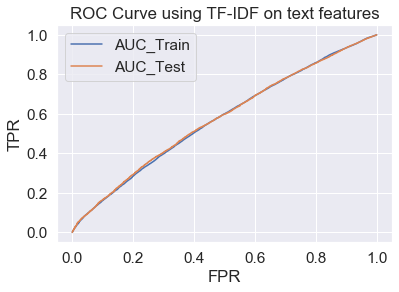

In [76]:
print("AUC(train) : ",auc(roc_data_train2[0],roc_data_train2[1]),"and AUC(test):",auc(roc_data_test2[0],roc_data_test2[1]))
plotROC(roc_data_test2[0], roc_data_train2[0],roc_data_test2[1], roc_data_train2[1], title2)

Maximum value of tpr*(1-fpr) 0.30555779097788954 for optimal threshold 0.7137099957962391


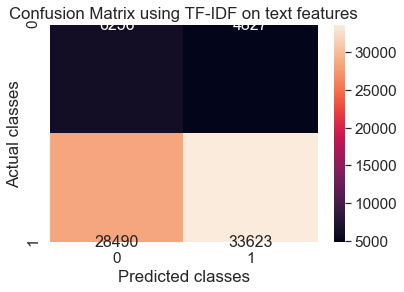

In [77]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train2[2],roc_data_train2[1],roc_data_train2[0], title2)

Maximum value of tpr*(1-fpr) 0.3081453374817935 for optimal threshold 0.7144838136903103


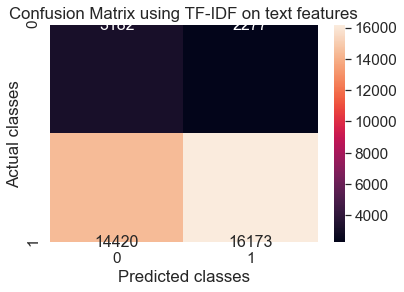

In [78]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test2[2],roc_data_test2[1],roc_data_test2[0], title2)

$Observation..$
1. For Tfidf encoded features, the Logistic Regression model gives a train AUC score of 0.572 and a test AUC score of 0.569
2. The auc score given by this is better than that of a random model(0.5)

* ### $2.4.1$ Applying Logistic Regression on W2V encoding,<font color='yellow'> SET $3$</font>

In [79]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_w2v = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train,grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train, train_title_avg_w2v,train_essay_avg_w2v)).tocsr()
X_test_merged_w2v = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test,teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test,standardized_teacher_no_test, test_title_avg_w2v, test_essay_avg_w2v)).tocsr()

print("FINAL DATA MATRIX FOR AVG W2V")
print(X_train_merged_w2v.shape, y_train.shape)
print(X_test_merged_w2v.shape, y_test.shape)

FINAL DATA MATRIX FOR AVG W2V
(73196, 703) (73196,)
(36052, 703) (36052,)


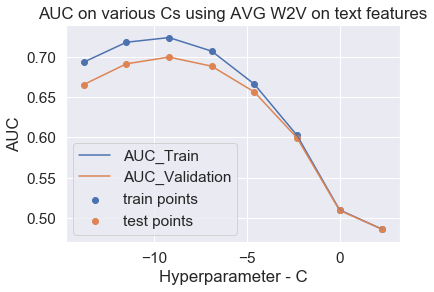

In [80]:
title3 = 'AVG W2V'

C3, auc_tr1, auc_cv1 = getAUC(X_train_merged_w2v, y_train)
plotPerformance(C3, auc_tr1, auc_cv1, title3)
optimal_C3 = getOptimal_C(C3,auc_cv1)
lro1 = train_using_optimal_c(optimal_C3, X_test_merged_w2v, y_test)
roc_data_test3, roc_data_train3 , pred_y_test ,pred_y_train = getROCData(X_test_merged_w2v, y_test, X_train_merged_w2v, y_train, lro1)

AUC(train) :  0.5543451177998779 and AUC(test): 0.5608060328565381


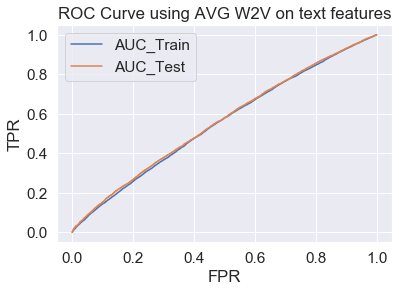

In [81]:
print("AUC(train) : ",auc(roc_data_train3[0],roc_data_train3[1]),"and AUC(test):",auc(roc_data_test3[0],roc_data_test3[1]))
plotROC(roc_data_test3[0], roc_data_train3[0],roc_data_test3[1], roc_data_train3[1], title3)

Maximum value of tpr*(1-fpr) 0.2915646740649865 for optimal threshold 0.8355267288870324


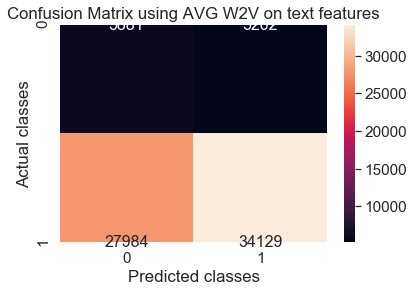

In [82]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train3[2],roc_data_train3[1],roc_data_train3[0], title3)

Maximum value of tpr*(1-fpr) 0.2933991996404322 for optimal threshold 0.8353544348581182


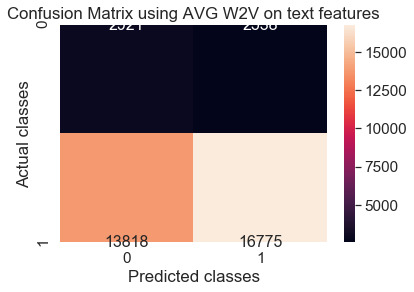

In [83]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test3[2],roc_data_test3[1],roc_data_test3[0], title3)

<b>OBSERVATIONS:</b>
1. The AUC score for both train and test data is less.It is just slightly better than a random model(0.5)
2. We can see , from the confusion matrix that almost around(more) 50% of points of both classes are correctly classified and around(less)
50% are incorrectly classified.

* ### $2.4.1$ Applying Logistic Regression on TFIDF weighted W2V encoding,<font color='yellow'> SET $4$</font>

In [84]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_tfidf_w2v = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train, train_title_tfidf_w2v, train_essay_tfidf_w2v)).tocsr()
X_test_merged_tfidf_w2v = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test, test_title_tfidf_w2v, test_essay_tfidf_w2v)).tocsr()

print("FINAL DATA MATRIX FOR Tfidf Weighted W2V")
print(X_train_merged_w2v.shape, y_train.shape)
print(X_test_merged_w2v.shape, y_test.shape)

FINAL DATA MATRIX FOR Tfidf Weighted W2V
(73196, 703) (73196,)
(36052, 703) (36052,)


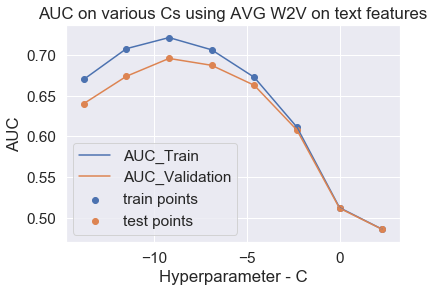

In [85]:
title4 = 'AVG W2V'

C4, auc_tr1, auc_cv1 = getAUC(X_train_merged_tfidf_w2v, y_train)
plotPerformance(C4, auc_tr1, auc_cv1, title4)
optimal_C4 = getOptimal_C(C4,auc_cv1)
lro1 = train_using_optimal_c(optimal_C4, X_test_merged_w2v, y_test)
roc_data_test4, roc_data_train4 , pred_y_test ,pred_y_train = getROCData(X_test_merged_w2v, y_test, X_train_merged_w2v, y_train, lro1)

AUC(train) :  0.5543451177998779 and AUC(test): 0.5608060328565381


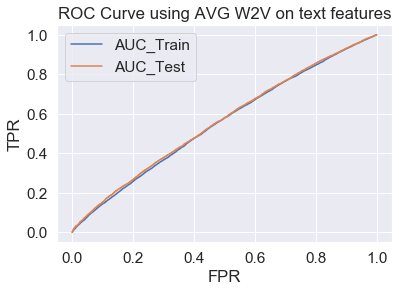

In [86]:
print("AUC(train) : ",auc(roc_data_train4[0],roc_data_train4[1]),"and AUC(test):",auc(roc_data_test4[0],roc_data_test4[1]))
plotROC(roc_data_test4[0], roc_data_train4[0],roc_data_test4[1], roc_data_train4[1], title4)

Maximum value of tpr*(1-fpr) 0.2915646740649865 for optimal threshold 0.8355267288870324


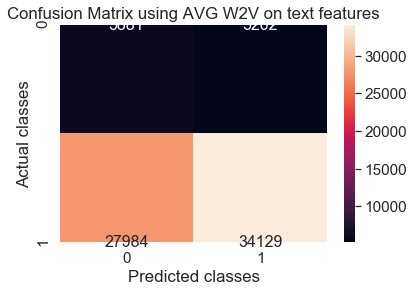

In [87]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train4[2],roc_data_train4[1],roc_data_train4[0], title4)

Maximum value of tpr*(1-fpr) 0.2933991996404322 for optimal threshold 0.8353544348581182


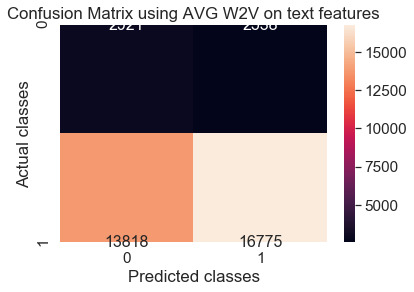

In [88]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test4[2],roc_data_test4[1],roc_data_test4[0], title4)

<b>OBSERVATIONS:</b>
1. Similarly, here also the AUC score for both train and test data is less.However it is better  than a random model(0.5)
2. We can see , from the confusion matrix that almost around(more) 50% of points of both classes are correctly classified and around(less) 50% are incorrectly classified.

<strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter .</strong>

<li> Consider these set of features <font color='red'> Set 5</font> :
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>

<b>NOTE:</b> In set5 we are not taking the actual text data of Essays and Titles.Here we are taking features extracted from 
the essay texts and Title texts

In [89]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_2 = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train,\
                         grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train,\
                         standardized_quantity_train, standardized_teacher_no_train,standardized_sentiment_train,\
                         standardized_essay_size_train,standardized_title_size_train )).tocsr()
X_test_merged_2 = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test,\
                        teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test,\
                        standardized_teacher_no_test,standardized_sentiment_test,standardized_essay_size_test,\
                        standardized_title_size_test)).tocsr()


print("FINAL DATA MATRIX FOR BOW")
print(X_train_merged_2.shape, y_train.shape)
print(X_test_merged_2.shape, y_test.shape)


FINAL DATA MATRIX FOR BOW
(73196, 106) (73196,)
(36052, 106) (36052,)


In [129]:
#Modified Functions
def plotPerformance_2(C, auc_train, auc_cv):
    plt.plot(np.log(C), auc_train, label='AUC_Train')
    plt.plot(np.log(C), auc_cv, label='AUC_Validation')
    plt.scatter(np.log(C), auc_train, label='train points')
    plt.scatter(np.log(C), auc_cv, label='test points')
    plt.xlabel('log(C)')
    plt.ylabel('AUC')
    plt.title("AUC on various Cs")
    plt.legend()
def plotROC_2(fpr_test,fpr_tr, tpr_test,tpr_tr):
    plt.plot(fpr_tr, tpr_tr, label='AUC_Train')
    plt.plot(fpr_test, tpr_test, label='AUC_Test')
    plt.title("ROC Curve using new features set")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
def getConfusionMatrix_2(y_ , y_pred , thresholds , tpr, fpr):
    #fmt='g': https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
    cm = confusion_matrix(y_, predicted_Values(y_pred, thresholds, tpr, fpr))
    cm_ = pd.DataFrame(cm, range(2),range(2))
    sns.set(font_scale= 1.5)
    sns.heatmap(cm_, annot=True,annot_kws={"size": 20}, fmt='d')
    plt.xlabel("Predicted classes")
    plt.ylabel("Actual classes")
    plt.title('Confusion Matrix using new features set')

Optimal C : 0.001


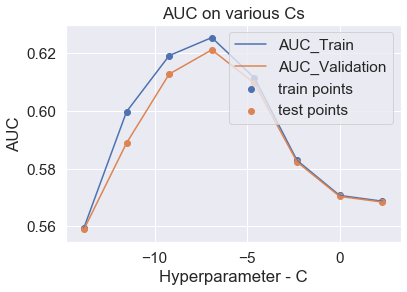

In [91]:
C_new, auc_tr1, auc_cv1 = getAUC(X_train_merged_2, y_train)
plotPerformance_2(C_new, auc_tr1, auc_cv1)
optimal_C_new = getOptimal_C(C_new,auc_cv1)
print("Optimal C :",optimal_C_new)
lro1 = train_using_optimal_c(optimal_C_new, X_test_merged_2, y_test)
roc_data_test_new, roc_data_train_new , pred_y_test ,pred_y_train = getROCData(X_test_merged_2, y_test\
                                                                         , X_train_merged_2, y_train, lro1)

AUC(train) :  0.6177483060284779 and AUC(test): 0.6243163774742222


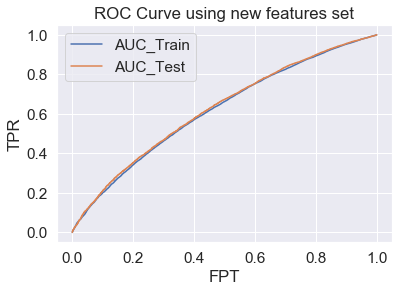

In [92]:
print("AUC(train) : ",auc(roc_data_train_new[0],roc_data_train_new[1]),"and AUC(test):",auc(roc_data_test_new[0],roc_data_test_new[1]))
plotROC_2(roc_data_test_new[0], roc_data_train_new[0],roc_data_test_new[1], roc_data_train_new[1])

Maximum value of tpr*(1-fpr) 0.3425465561707837 for optimal threshold 0.8222210186230999


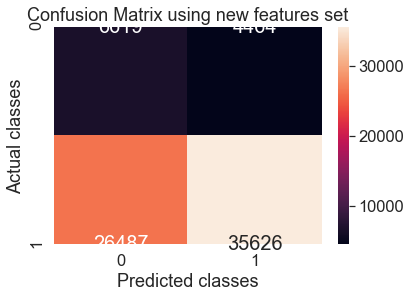

In [130]:
getConfusionMatrix_2(y_train,pred_y_train,roc_data_train_new[2],roc_data_train_new[1],roc_data_train_new[0])

Maximum value of tpr*(1-fpr) 0.34723703237992987 for optimal threshold 0.8186902708909883


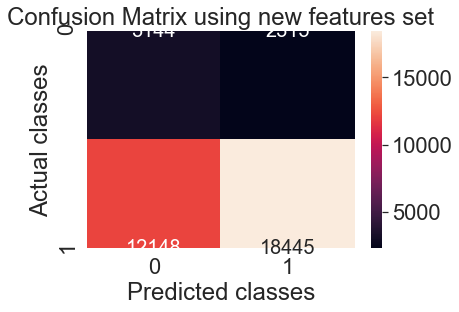

In [113]:
getConfusionMatrix_2(y_test,pred_y_test,roc_data_test_new[2],roc_data_test_new[1],roc_data_test_new[0])

<b>Observation:</b>
1. For set5 features, the LR model gives train AUC score of and test AUC score of which is better than a random model<br>
2. Also, in this feature set we are not taking the actual text data of essays and titles and we are taking the features derieved from the text(Sentiment score, essay length, title length )

In [95]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Vectorizer", "Hyper Parameter", "AUC(train data)","AUC(test data)"]

table.add_row(["BOW", optimal_C1, auc(roc_data_train1[0],roc_data_train1[1]) ,auc(roc_data_test1[0],roc_data_test1[1])])
table.add_row(["TFIDF", optimal_C2, auc(roc_data_train2[0],roc_data_train2[1]),auc(roc_data_test2[0],roc_data_test2[1])])
table.add_row(["AVG_W2V", optimal_C3, auc(roc_data_train3[0],roc_data_train3[1]),auc(roc_data_test3[0],roc_data_test3[1])])
table.add_row(["TFIDF_W2V", optimal_C4, auc(roc_data_train4[0],roc_data_train4[1]),auc(roc_data_test4[0],roc_data_test4[1])])
table.add_row(["With set5 features ", optimal_C_new, auc(roc_data_train_new[0],roc_data_train_new[1]),auc(roc_data_test_new[0],roc_data_test_new[1])])

print (table)

+---------------------+-----------------+--------------------+--------------------+
|      Vectorizer     | Hyper Parameter |  AUC(train data)   |   AUC(test data)   |
+---------------------+-----------------+--------------------+--------------------+
|         BOW         |      0.001      | 0.6512277696691091 | 0.6836887085583927 |
|        TFIDF        |      0.0001     | 0.5725822169607404 | 0.5749691957867658 |
|       AVG_W2V       |      0.0001     | 0.5543451177998779 | 0.5608060328565381 |
|      TFIDF_W2V      |      0.0001     | 0.5543451177998779 | 0.5608060328565381 |
| With set5 features  |      0.001      | 0.6177483060284779 | 0.6243163774742222 |
+---------------------+-----------------+--------------------+--------------------+


$OBSERVATIONS...$

1. For, BOW encoding of textual data, the Logistic regression model gives a good auc score(0.68), which is much better than a random model.
1. For, Tfidf encoding of textual data, the Logistic regression model gives a fair auc score(0.56), which is better than a random model.
2. Also for set5 features(which doesnot contain the essay and title texts) , the LR model gives an good auc score(0.61).And it gives the prediction without taking the actual textual data vectors(which are large encoded sparse vectors).And  it gives a auc score better than a random model(0.5) and also better than tfidf,word2vec or tfidf weighted word2vec encoded text features.
3. For Avg Word2Vec and Tfidf weighted Word2Vec enccodings of textual data,LR model gives an auc score which is actually just slightly better(0.55) than a random model(0.5).
4. So we see that, Logistic regression model give a good performance for BOW encoding and the featurs of set5(which doenot contain large sparse vectors) and it gives a fair core for tfidf, word2vec and tfidf weighted word2vec encodings(better than a random model) ) word2vec and tfidf weighted word2vec encodings of this data and gives better performance forBag of Words and Tfidf encoding of text data.
